In [ ]:
# Eng/Amr Mostafa Omar
# Nile University ,Cairo, Egypt
# Data 16/4/2024

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=e87d71a4c724109b6ed159caa68124912a2bc2fe70243f225d44cb2cf8ede2ff
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 3.7 MB/s eta 0:00:00


##**The methodology used in this project involves several steps:**

**1. Data Loading:**
   - Mount Google Drive to access files.
   - Load the training dataset from Google Drive using Pandas.

**2. Explore Dataset:**
   - Check the first few rows of the dataset to understand its structure.
   - Check for missing values and handle them appropriately.
   - Verify if all texts in the dataset are from the same language and remove non-English samples if necessary.

**3. Data Preprocessing and Cleaning:(Apply 2 preprocessing techniques)**
   - Preprocess the text data by removing non-alphanumeric characters, single letters, numbers, and non-English characters.
   - Tokenize the text, remove stop words, and apply stemming or lemmatization for English text.
   - Clean and preprocess the text using both stemming and lemmatization techniques separately.
   
**4. Describe and Analyze Dataset:**
   - Analyze word frequency to identify common and uncommon words.
   - Visualize the distribution of text lengths and label counts using histograms and bar charts.
   - Drop samples with label 2 from the dataset to ensure binary labels (0 or 1).

**5. Preprocessing and Splitting Data:**
   - Split the preprocessed data into training and validation sets for each preprocessing approach.

**6. Model Training and Evaluation Trials:**
   - Perform multiple model training and evaluation trials using different combinations of preprocessing techniques and classifiers.
   - For each trial:
     - Train classifiers such as XGBoost Classifier and Logistic Regression on the preprocessed data.
     - Tune hyperparameters using techniques like Randomized Search.
     - Evaluate model performance using AUROC as the metric.

**7. Load Testing Data and Preprocess:**
   - Load the testing data from Google Drive.
   - Apply the same preprocessing steps as done for the training data.

**8. Get Predictions and Save Files:**
   - Use the trained models to make predictions on the testing data.
   - Save the prediction files into CSV format for further analysis or submission.


##**1-Problem Definition:**

* **Input:** The input consists of Reddit post titles.
* **Output:** The output is a binary classification indicating whether the post title is fake news or not.
* **Data mining function:** A classification algorithm is required to perform the task. This involves training a model on labeled data to predict the class labels of new instances.
* **Challenges:** Some challenges include:
Data quality: Ensuring the quality and reliability of the labeled data is crucial.
* **Feature extraction:** Identifying informative features from the text data that can effectively distinguish between fake and genuine news.
* **Model selection:** Choosing an appropriate classification algorithm and optimizing its parameters.
Handling imbalanced data: If there's a significant class imbalance in the dataset, it may affect the model's performance.
* **Impact:** The impact of successfully classifying Reddit post titles as fake news or genuine can help in combating misinformation and disinformation on social media platforms, contributing to a healthier online information ecosystem.
* **Ideal solution:** An ideal solution would involve:
1. High accuracy in classifying post titles.
2. Robustness to handle variations in language and topic.
3. Scalability to process a large volume of data efficiently.
4. Interpretability to understand the factors influencing the classification decisions.
5. Regular updates to adapt to evolving trends and tactics used in spreading fake news.

In [ ]:
# Import  libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from langdetect import detect
from skopt import BayesSearchCV
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from langdetect import detect
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from bokeh.models import NumeralTickFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Mount Google Drive to access files
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##**2-Data Loading:**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/xy_train.csv')

In [ ]:
data.shape

(60000, 3)

###**Explore dataset**

In [ ]:
# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(10))

First few rows of the dataset:
       id                                               text  label
0  265723  A group of friends began to volunteer at a hom...      0
1  284269  British Prime Minister @Theresa_May on Nerve A...      0
2  207715  In 1961, Goodyear released a kit that allows P...      0
3  551106  Happy Birthday, Bob Barker! The Price Is Right...      0
4    8584  Obama to Nation: 聙"Innocent Cops and Unarmed Y...      0
5  117912  In the 1920鈥檚, Hitler was forbidden to address...      0
6  213064  Nerd Wins Scrabble with word you've never hear...      0
7  398923  Why 95.8% of Female Newscasters Have the Same ...      1
8  314798  Donald Trump Says He'll Do This If More 'Inapp...      0
9   20243  5 crazy facts about Lamborghini's outrageous e...      0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60000 non-null  int64 
 1   text    60000 non-null  object
 2   label   60000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [ ]:
data.columns

Index(['id', 'text', 'label'], dtype='object')

In [ ]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
id       0
text     0
label    0
dtype: int64


## **Check if all texts in dataset are from same language**

In [ ]:
languages = set()

In [ ]:
for text in data['text']:
    try:
        lang = detect(text)
        languages.add(lang)
    except:
        pass  #

if len(languages) == 1:
    print(f"All text in the dataset is in {languages.pop()} language.")
else:
    print("Text in the dataset is in multiple languages.")

Text in the dataset is in multiple languages.


In [ ]:
total_samples = len(data['id'])
non_english_samples = []
english_samples = []

for idx, text in zip(data['id'], data['text']):
    try:
        lang = detect(text)
        # Check if language is English
        if lang == 'en':
            # Store the ID and text of English samples
            english_samples.append((idx, text))
        else:
            # Store the ID of non-English sample
            non_english_samples.append(idx)
    except:
        pass  # Handle exceptions gracefully

In [ ]:
# Calculate the percentage of non-English text
percentage_non_english = (len(non_english_samples) / total_samples) * 100

print("Sample IDs that are not in English:", non_english_samples)
print("Percentage of text that is not in English language:", percentage_non_english, "%")

Sample IDs that are not in English: [431198, 542881, 297566, 324530, 232823, 402676, 279768, 348737, 20593, 27695, 308546, 411997, 107486, 343588, 557099, 339458, 505207, 136580, 21013, 261476, 463539, 353553, 79735, 531858, 492556, 233466, 359877, 109376, 152415, 321376, 154318, 303665, 140013, 351615, 504261, 535423, 225426, 387551, 424961, 64334, 58362, 444458, 497711, 351108, 299404, 244975, 237670, 422423, 51843, 361474, 350619, 259057, 113540, 403522, 264336, 263501, 447310, 312326, 546018, 336848, 80038, 96985, 276664, 348709, 136447, 495740, 4651, 117987, 241366, 277437, 180735, 478839, 363687, 106726, 274757, 27193, 222350, 544093, 131305, 135803, 46438, 501801, 404779, 346779, 420748, 234089, 508874, 495472, 543563, 253036, 302967, 139272, 249882, 252157, 115866, 482848, 444610, 335690, 81900, 76413, 137996, 527939, 376376, 532200, 218489, 310160, 198374, 239843, 177042, 368315, 134188, 408905, 314894, 295069, 18207, 513716, 269612, 300817, 352352, 481547, 275696, 64253, 4910

In [ ]:
# Drop non-English samples from the DataFrame
data = data[~data['id'].isin(non_english_samples)]

In [ ]:
data.shape

(59814, 3)

## **Data preprocessing and cleaning**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def preprocess_text_stemmer(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', str(text))
    # Remove single letters
    text = re.sub(r'\b\w{1}\b', '', str(text))
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', str(text))

    # Remove non-English characters (keep only English words)
    text = re.sub(r'[^\x00-\x7F]+', '', str(text))

    # Remove words with numbers
    text = re.sub(r'\b\w*\d\w*\b', '', str(text))
    # Remove words with special characters
    text = re.sub(r'\b\w*[^\w\s]+\w*\b', '', str(text))

    # Detect language
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    # Only preprocess English text
    if lang == 'en':
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

        # Stemming
        stemmer = PorterStemmer()
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

        # Join tokens back into text
        preprocessed_text = ' '.join(stemmed_tokens)
    else:
        # Return original text for non-English
        preprocessed_text = text

    return preprocessed_text

In [ ]:
# Apply preprocessing function
data['text_stemmer'] = data['text'].apply(preprocess_text_stemmer)

In [ ]:
# Print cleaned texts
print("\nCleaned text:")
print(data['text_stemmer'])


Cleaned text:
0        group friend began volunt homeless shelter nei...
1        british prime minist theresa_may nerv attack f...
2        goodyear releas kit allow brought heel http yo...
3        happi birthday bob barker price right host lik...
4        obama nation innoc cop unarm young black men d...
                               ...                        
59995      finish sniper simo hyh invas finland ussr color
59996    nigerian princ scam took kansa man year later ...
59997         safe smoke marijuana pregnanc surpris answer
59998    juliu caesar upon realiz everyon room knife ex...
59999    jeff bridg releas leep tape new album design h...
Name: text_stemmer, Length: 59814, dtype: object


In [ ]:
def preprocess_text_lemmatized(text):


    # Remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', str(text))
    # Remove single letters
    text = re.sub(r'\b\w{1}\b', '', str(text))
    # Remove numbers
    text = re.sub(r'\b\d+\b', '', str(text))

    # Remove non-English characters (keep only English words)
    text = re.sub(r'[^\x00-\x7F]+', '', str(text))

    # Remove words with numbers
    text = re.sub(r'\b\w*\d\w*\b', '', str(text))
    # Remove words with special characters
    text = re.sub(r'\b\w*[^\w\s]+\w*\b', '', str(text))

    # Detect language
    try:
        lang = detect(text)
    except:
        lang = 'unknown'

    # Only preprocess English text
    if lang == 'en':
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

        # Join tokens back into text
        preprocessed_text = ' '.join(lemmatized_tokens)
    else:
        # Return original text for non-English
        preprocessed_text = text

    return preprocessed_text

In [ ]:
# Apply preprocessing function to 'title' column
data['text_lemmatized'] = data['text'].apply(preprocess_text_lemmatized)

In [ ]:
# Print cleaned texts
print("\nCleaned text:")
print(data['text_lemmatized'])


Cleaned text:
0        group friend began volunteer homeless shelter ...
1        British Prime Minister Theresa_May Nerve Attac...
2        Goodyear released kit allows brought heel http...
3        Happy Birthday Bob Barker Price Right Host Lik...
4        Obama Nation Innocent Cops Unarmed Young Black...
                               ...                        
59995    Finish Sniper Simo Hyh invasion Finland USSR c...
59996    Nigerian Prince Scam took Kansas man year late...
59997      Safe Smoke Marijuana Pregnancy Surprised Answer
59998    Julius Caesar upon realizing everyone room kni...
59999    Jeff Bridges Releasing leeping Tapes New Album...
Name: text_lemmatized, Length: 59814, dtype: object


In [ ]:
data.shape

(59814, 5)

###**Discribe and analyise dataset**

In [ ]:
# Word Frequency of most common words
word_freq = pd.Series(" ".join(data["text_stemmer"]).split()).value_counts()
word_freq[1:40]

new         3758
one         3301
like        3120
look        2851
color       2737
man         2721
get         2602
trump       2592
say         2352
peopl       2323
use         2308
first       2253
make        2235
old         2232
time        2036
found       2000
poster      1958
day         1935
war         1853
post        1649
world       1570
work        1530
show        1520
american    1509
us          1501
life        1495
take        1491
help        1446
go          1430
state       1407
back        1370
two         1368
school      1347
see         1335
photo       1324
made        1316
right       1313
save        1305
hous        1258
Name: count, dtype: int64

In [ ]:
# list most uncommon words
word_freq[-50:]

gaviria                   1
emilio                    1
tearabl                   1
beeker                    1
cleverest                 1
gular                     1
ntiqu                     1
eurow                     1
wahoo                     1
theist                    1
viewabl                   1
pittock                   1
bloodmoon                 1
foodsut                   1
maureen                   1
budden                    1
redcup                    1
deadass                   1
tastic                    1
toffe                     1
stillpati                 1
futureleak                1
illegitm                  1
yanquiuxo                 1
edward_taserhand          1
photon                    1
zen                       1
drued                     1
cleanser                  1
perspir                   1
antivietnam               1
jade_pornsurg             1
lute                      1
jowl                      1
fatdonuthol               1
quavo               

In [ ]:
# Distribution of ratings
data["label"].value_counts()

label
0    32032
1    27553
2      229
Name: count, dtype: int64

###**Data Visualization**



In [ ]:
# a histogram of text lengths
data['text_length'] = data['text_stemmer'].apply(len)

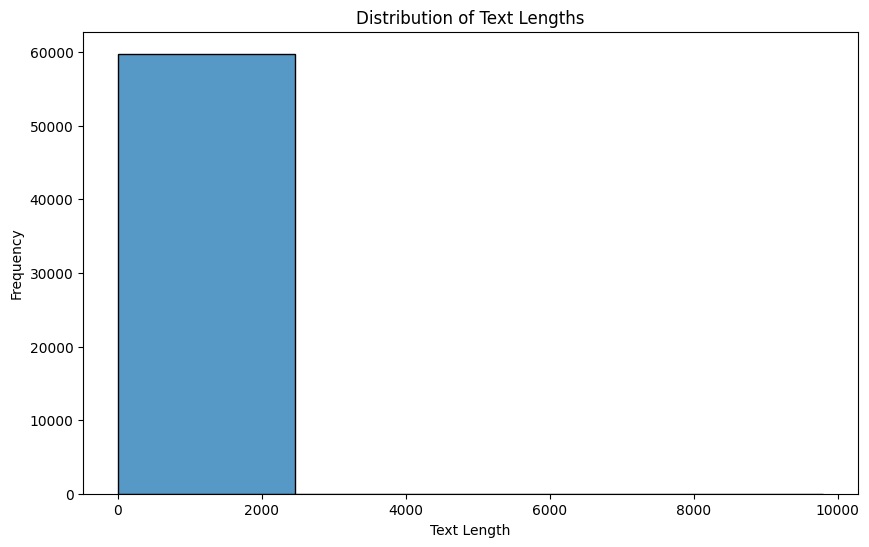

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=4)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

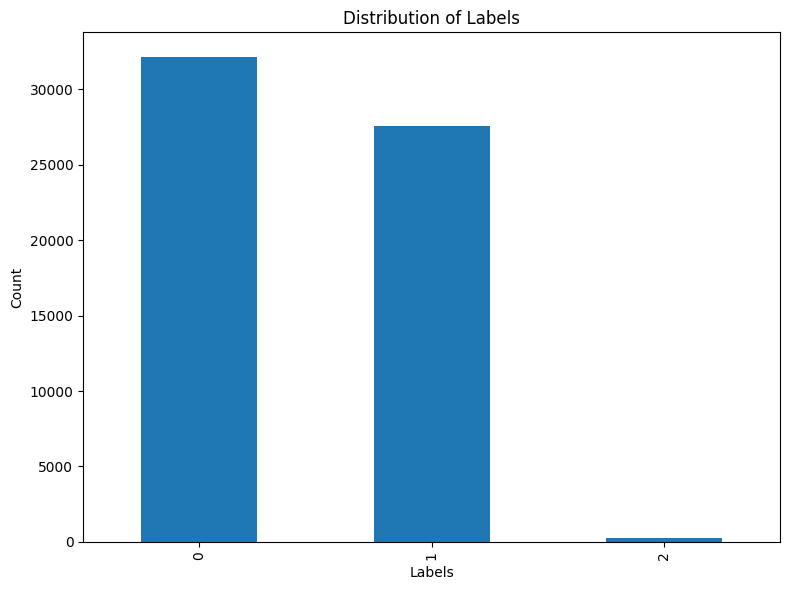

In [ ]:
label_counts = data["label"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()

In [ ]:
# Drop label 2 from the dataset
data = data[data["label"] != 2]

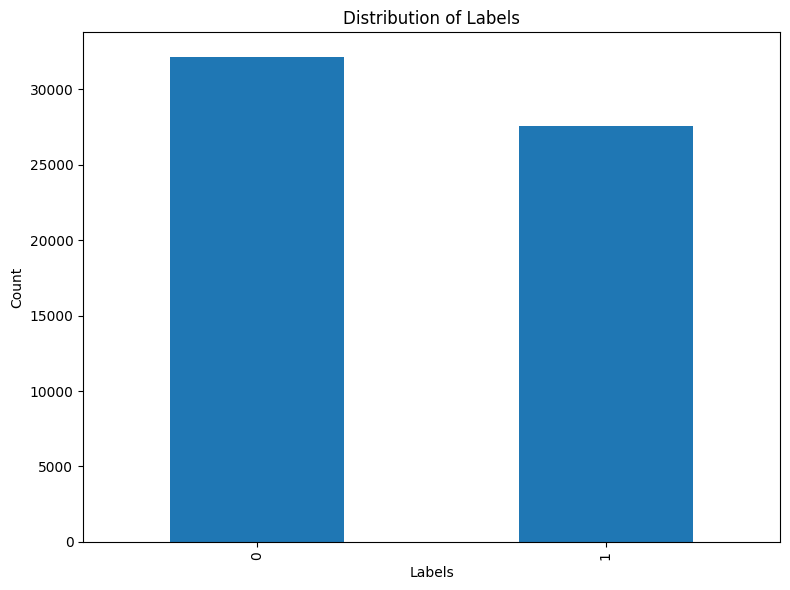

In [ ]:
label_counts = data["label"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()
plt.show()

### `We droped label 2 from dataset ,as labels od data should be binary 0 or 1.Existing of third category has no meaning speacialy in our case (Real VS Fake news)`

## **Preprocessing 1**

## **Split data into training and validation set**

In [ ]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(data['text_stemmer'], data['label'], test_size=0.2, random_state=42, stratify=data['label'] , shuffle=True)

In [ ]:
X_train.shape

(47851,)

In [ ]:
X_val.shape

(11963,)

In [ ]:
y_train.shape

(47851,)

In [ ]:
y_val.shape

(11963,)

##**Expectation :Trial 1**
* XGBoost is a powerful algorithm known for its effectiveness in handling structured and unstructured data, including text data.
TF-IDF vectorization captures important term frequencies while reducing the impact of common terms.
* AUROC expectation: Moderate to good, around 0.75 to 0.85.

##**Trial 1**

In [ ]:
# Iteration 1
pipeline_1 = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word')),
    ('clf', xgb.XGBClassifier())
])

param_grid_1 = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__learning_rate': [0.1, 0.01],
    'clf__max_depth': [3, 5, 7]
}

In [ ]:
random_search_1 = RandomizedSearchCV(pipeline_1, param_grid_1, cv=1)
# Training model
random_search_1.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                             ('clf',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importance_type=No...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   param_distributions={'clf__learning_rate': [0.1, 0.01],
                                        'clf__max_depth': [3, 5, 7],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3)]})

In [ ]:
best_model_1 = random_search_1.best_estimator_

In [ ]:
y_pred_1 = best_model_1.predict_proba(X_val)
auroc_1 = roc_auc_score(y_val, y_pred_1)

In [ ]:
# Print AUROC for trial 1
print("AUROC for Iteration 1:", auroc_1)

AUROC for Iteration 1: 0.7816916680131986


##**Observations:**
* AUROC : 0.7817 falls within the expected range, indicating a reasonable performance.

##**Expectation: Trial 2**
* Logistic Regression is a commonly used classifier for text classification tasks.TF-IDF vectorization provides meaningful term weights for the Logistic Regression model.
* AUROC expectation: Good, around 0.80 to 0.85.

##**Trial 2**

In [ ]:
pipeline_2 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word')),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid_2 = {
    'tfidf__max_features': [1000, 2000, 3000],
    'clf__C': [0.1, 1.0, 10.0]
}


In [ ]:
# Create RandomizedSearchCV with the pipeline and parameter grid
random_search_2 = RandomizedSearchCV(pipeline_2, param_distributions=param_grid_2, n_iter=10, cv=1)

# Training model
random_search_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__C': [0.1, 1.0, 10.0],
                                        'tfidf__max_features': [1000, 2000,
                                                                3000]})

In [ ]:
best_model_2 = random_search_2.best_estimator_

In [ ]:
y_pred_probs = best_model_2.predict_proba(X_val)
auroc_2 = roc_auc_score(y_val, y_pred_probs)

In [ ]:
# Print AUROC for trial 2
print("AUROC for Iteration 2:", auroc_2)

AUROC for Iteration 2: 0.8171304156306415


##**Observations: Trial 2**
* AUROC : 0.8171 meets the expectation, demonstrating the effectiveness of Logistic Regression with TF-IDF

##**Expectation: Trial 3**
* Character-level analysis with Logistic Regression may not capture semantic meaning as effectively as word-level analysis.
The penalty parameter and ngram range can significantly impact the model's performance.
* AUROC expectation: Lower due to character-level analysis, around 0.50 to 0.60.

##**Trial 3**

In [ ]:
# Define the pipeline
pipeline_3 = Pipeline([
    ('vect', CountVectorizer(analyzer='char')),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid_3 = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [1.0, 0.1, 0.01],
    'clf__penalty': ['l2']
}

In [ ]:
random_search_3 = RandomizedSearchCV(pipeline_3, param_distributions=param_grid_3, n_iter=10, cv=1, scoring='roc_auc')
# Training model
random_search_3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/loca

RandomizedSearchCV(estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(analyzer='char')),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__C': [1.0, 0.1, 0.01],
                                        'clf__penalty': ['l2'],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3)]},
                   scoring='roc_auc')

In [ ]:
best_model_3 = random_search_3.best_estimator_

In [ ]:
y_pred_3 = best_model_3.predict_proba(X_val)
auroc_3 = roc_auc_score(y_val, y_pred_3)

In [ ]:
# Print AUROC for trial 3
print("AUROC for Iteration 3:", auroc_3)

AUROC for Iteration 3: 0.5538634029627735


##**Observations: Trial 3**
* AUROC : 0.5539 aligns with the lower expectation, indicating that character-level analysis may not be suitable for this task.

## **Preprocessing 2**

## **Split data into training and validation set**

In [ ]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(data['text_lemmatized'], data['label'], test_size=0.2, random_state=42, stratify=data['label'] , shuffle=True)

##**Expectation: Trial 4**
* Similar to Trial 1 but with different hyperparameter settings and preprocessing, offering a chance for improved performance.
* AUROC expectation: Moderate to good, similar to Trial 1, around 0.75 to 0.85.

##**Trial 4**

In [ ]:
# Iteration 4
pipeline_4 = Pipeline([
    ('vect', TfidfVectorizer(analyzer='word')),
    ('clf', xgb.XGBClassifier())
])

param_grid_4 = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__learning_rate': [0.1, 0.01],
    'clf__max_depth': [3, 5, 7]
}

In [ ]:
random_search_4 = RandomizedSearchCV(pipeline_4, param_grid_4, cv=1)
random_search_4.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                             ('clf',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importance_type=No...
                                                            max_cat_to_onehot=None,
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   param_distributions={'clf__learning_rate': [0.1, 0.01],
                                        'clf__max_depth': [3, 5, 7],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3)]})

In [ ]:
best_model_4 = random_search_4.best_estimator_

In [ ]:
y_pred_4 = best_model_4.predict_proba(X_val)
auroc_4 = roc_auc_score(y_val, y_pred_1)

In [ ]:
# Print AUROC for trial 1
print("AUROC for Iteration 4:", auroc_4)

AUROC for Iteration 4: 0.7816916680131986


##**Observations: Trial 4**
* This falls within the expected range of moderate to good performance, as anticipated for a trial similar to Trial 1 but with different hyperparameter settings. The observed AUROC of 0.7817 indicates that this iteration achieved a reasonable performance level, consistent with the expectations based on the algorithm (XGBoost) and feature representation (TF-IDF vectorization).




##**Expectation: Trial 5**
* Similar to Trial 2 but with different hyperparameter settings and preprocessing, allowing exploration of different configurations.

* AUROC expectation: Good, similar to Trial 2, around 0.80 to 0.85.


##**Trial 5**

In [ ]:
pipeline_5 = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='word')),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid_5 = {
    'tfidf__max_features': [1500, 4000, 5000],
    'clf__C': [0.1, 1.0, 10.0]
}

In [ ]:
# Create RandomizedSearchCV with the pipeline and parameter grid
random_search_5 = RandomizedSearchCV(pipeline_5, param_distributions=param_grid_5, n_iter=10, cv=1)

# Training model
random_search_5.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

RandomizedSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__C': [0.1, 1.0, 10.0],
                                        'tfidf__max_features': [1000, 2000,
                                                                3000]})

In [ ]:
best_model_5 = random_search_5.best_estimator_

In [ ]:
y_pred_probs = best_model_5.predict_proba(X_val)
auroc_5 = roc_auc_score(y_val, y_pred_probs)

In [ ]:
# Print AUROC for trial 5
print("AUROC for Iteration 5:", auroc_5)

AUROC for Iteration 5: 0.82648143062752


##**Observations:  Trial 5**
AUROC : 0.8265 meets the expectation, indicating the effectiveness of Logistic Regression with TF-IDF. ` The best trial we found`

##**Expectation: Trial 6**
* Similar to Trial 3 but with different hyperparameter settings and preprocessing method, exploring alternatives for character-level analysis.

* AUROC expectation: Lower, similar to Trial 3, around 0.50 to 0.60.

##**Trial 6**

In [ ]:
# Define the pipeline
pipeline_6 = Pipeline([
    ('vect', CountVectorizer(analyzer='char')),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid_6 = {
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [1.0, 0.1, 0.01],
    'clf__penalty': ['l2']
}

In [ ]:
random_search_6 = RandomizedSearchCV(pipeline_6, param_distributions=param_grid_6, n_iter=10, cv=1, scoring='roc_auc')
random_search_6.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/loca

RandomizedSearchCV(estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(analyzer='char')),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__C': [1.0, 0.1, 0.01],
                                        'clf__penalty': ['l2'],
                                        'vect__ngram_range': [(1, 1), (1, 2),
                                                              (1, 3)]},
                   scoring='roc_auc')

In [ ]:
best_model_6 = random_search_6.best_estimator_

In [ ]:
y_pred_6 = best_model_6.predict_proba(X_val)
auroc_6 = roc_auc_score(y_val, y_pred_6)

In [ ]:
# Print AUROC for trial 6
print("AUROC for Iteration 6:", auroc_6)

AUROC for Iteration 6: 0.5777998792699628


##**Observations:**
* AUROC : `0.5778` aligns with the lower expectation, suggesting that character-level analysis may not be the best choice for this task.

### **Load the testing data**

In [ ]:
test_data = pd.read_csv('/content/gdrive/MyDrive/x_test.csv')

In [ ]:
total_samples = len(test_data['id'])
non_english_samples = []
english_samples = []

for idx, text in zip(test_data['id'], test_data['text']):
    try:
        lang = detect(text)
        # Check if language is English
        if lang == 'en':
            # Store the ID and text of English samples
            english_samples.append((idx, text))
        else:
            # Store the ID of non-English sample
            non_english_samples.append(idx)
    except:
        pass  # Handle exceptions gracefully

In [ ]:
# Calculate the percentage of non-English text
percentage_non_english = (len(non_english_samples) / total_samples) * 100

print("Sample IDs that are not in English:", non_english_samples)
print("Percentage of text that is not in English language:", percentage_non_english, "%")

Sample IDs that are not in English: [0, 1, 4, 7, 17, 20, 28, 33, 42, 46, 47, 52, 54, 64, 73, 84, 90, 92, 99, 103, 109, 116, 121, 126, 144, 148, 159, 164, 180, 184, 186, 193, 194, 198, 204, 210, 217, 224, 236, 240, 241, 242, 244, 248, 253, 256, 259, 262, 265, 280, 283, 288, 292, 293, 294, 295, 297, 303, 325, 342, 349, 351, 358, 361, 363, 364, 368, 380, 387, 391, 399, 402, 405, 419, 425, 426, 430, 432, 434, 435, 444, 448, 453, 456, 457, 462, 464, 479, 489, 491, 493, 494, 496, 503, 510, 519, 523, 526, 534, 536, 539, 548, 551, 556, 557, 564, 567, 569, 575, 576, 590, 594, 597, 600, 601, 602, 631, 639, 642, 643, 646, 650, 651, 670, 672, 683, 685, 686, 691, 695, 698, 704, 708, 710, 711, 718, 722, 731, 734, 737, 741, 759, 765, 771, 775, 781, 783, 787, 793, 794, 798, 805, 815, 820, 824, 826, 845, 846, 849, 854, 856, 863, 864, 865, 869, 892, 896, 901, 904, 913, 917, 920, 922, 927, 941, 943, 949, 957, 959, 960, 970, 980, 981, 994, 997, 1009, 1020, 1024, 1026, 1027, 1032, 1035, 1038, 1041, 1045, 1

In [ ]:
test_data.shape

(59151, 2)

### **Preprocessing 1**

In [ ]:
# Apply preprocessing function
test_data['text_stemmer'] = test_data['text'].apply(preprocess_text_stemmer)

In [ ]:
# Print cleaned texts
print("\nCleaned text:")
print(test_data['text_stemmer'])


Cleaned text:
0                                             stargazer 
1                                                   yeah
2         pd phoenix car thief get instruct youtub video
3                   trump accus iran one problem credibl
4                                   Believers Hezbollah 
                              ...                       
59146                       bicycl taxi driver new delhi
59147               trump blow gop formula win hous race
59148    napoleon return exil island elba march colouris
59149                      deep alway want ballet dancer
59150         toddler miracul surviv stori fall land car
Name: text_stemmer, Length: 59151, dtype: object


### **Preprocessing 2**

In [ ]:
# Apply preprocessing function
test_data['text_lemmatized'] = test_data['text'].apply(preprocess_text_lemmatized)

In [ ]:
# Print cleaned texts
print("\nCleaned text:")
print(test_data['text_lemmatized'])


Cleaned text:
0                                               stargazer 
1                                                     yeah
2        PD Phoenix car thief get instruction YouTube v...
3               Trump Accuses Iran One Problem Credibility
4                                     Believers Hezbollah 
                               ...                        
59146                        Bicycle taxi driver New Delhi
59147            Trump blow GOP formula winning House race
59148    Napoleon return exile island Elba March Colour...
59149                     Deep always wanted ballet dancer
59150    Toddler miraculously survives story fall landi...
Name: text_lemmatized, Length: 59151, dtype: object


In [ ]:
id =test_data['id']

### **Get Prediction**

In [ ]:
y_test_pred_1 = best_model_1.predict_proba(test_data['text_stemmer'])[:, 1]
y_test_pred_2 = best_model_2.predict_proba(test_data['text_stemmer'])[:, 1]
y_test_pred_3 = best_model_3.predict_proba(test_data['text_stemmer'])[:, 1]
y_test_pred_4 = best_model_4.predict_proba(test_data['text_lemmatized'])[:, 1]
y_test_pred_5 = best_model_5.predict_proba(test_data['text_lemmatized'])[:, 1]
y_test_pred_6 = best_model_6.predict_proba(test_data['text_lemmatized'])[:, 1]

### **Saving prediction files**

In [ ]:
submission_1 = pd.DataFrame({'id': id, 'label': y_test_pred_1})

submission_1.to_csv('y_test_pred_1.csv', index=False)

In [ ]:
submission_2 = pd.DataFrame({'id': id, 'label': y_test_pred_2})

submission_2.to_csv('y_test_pred_2.csv', index=False)

In [ ]:
submission_3 = pd.DataFrame({'id': id, 'label': y_test_pred_3})

submission_3.to_csv('y_test_pred_3.csv', index=False)

In [ ]:
submission_4 = pd.DataFrame({'id': id, 'label': y_test_pred_4})

submission_4.to_csv('y_test_pred_4.csv', index=False)

In [ ]:
submission_5 = pd.DataFrame({'id': id, 'label': y_test_pred_5})

submission_5.to_csv('y_test_pred_5.csv', index=False)

In [ ]:
submission_6 = pd.DataFrame({'id': id, 'label': y_test_pred_6})

submission_6.to_csv('y_test_pred_6.csv', index=False)

#**Questions:**

1.	**What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue??**



* **Character n-gram**: It involves breaking text into sequences of characters, such as "hello" being represented as ['h', 'e', 'l', 'l', 'o'] for a character 1-gram or ['he', 'el', 'll', 'lo'] for a character 2-gram (bigram).
* **Word n-gram:** This approach breaks text into sequences of words, like "natural language processing" represented as ['natural', 'language', 'processing'] for a word 1-gram or ['natural language', 'language processing'] for a word 2-gram (bigram).
* `Character n-grams tend to suffer more from the Out of Vocabulary (OOV) issue because they generate a larger number of unique n-grams, especially in languages with complex character structures like Chinese or languages with inflectional morphology like German.`

2.	 **What is the difference between stop word removal and stemming? Are these techniques language-dependent?**


* **Stop word removal** involves filtering out common words ("the," "is," "and") that often do not contribute much to the meaning of a sentence.
* **Stemming** involves reducing words to their base or root form ("running" to "run") to normalize variations.
* `These techniques are generally language-independent, although specific stop word lists or stemming algorithms might be tailored for certain languages.`

3.  **Is tokenization techniques language dependent? Why?**


* **Tokenization techniques** is the process of breaking text into smaller units, such as words, phrases, or characters. While basic tokenization like splitting on whitespace can be language-independent, more advanced tokenization techniques may be language-dependent
* `Languages can have unique rules for word boundaries, compound words, punctuation handling, and tokenization exceptions. For example, languages like Chinese do not use spaces between words, requiring specialized tokenization techniques like Chinese word segmentation.`.

4.	**What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

* **Count Vectorizer**  It represents text documents as frequency counts of words in a fixed vocabulary. Each document is represented by a vector where each element corresponds to the count of a word in the vocabulary.
* **TF-IDF Vectorizer** TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer considers the importance of words by weighing them based on their frequency in the document (TF) and rarity across documents (IDF). It assigns higher weights to words that are frequent in a document but rare in the overall corpus, helping to emphasize more meaningful terms.

* `It may not be feasible to use all possible n-grams due to the curse of dimensionality and computational complexity. N-gram selection depends on the dataset size, computational resources, and the specific task. Techniques like feature selection or dimensionality reduction can help select relevant n-grams efficiently.`